In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import sys

In [7]:
img = cv.imread('nagyung.jpeg')
if img is None:
    sys.exit("Could not read the image.")
imgbnw = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Grayscale
if imgbnw is None:
    sys.exit("Could not read the image.")

In [6]:
cv.imshow("Nagyung",img)
cv.waitKey(0)

13

In [8]:
cv.imshow("Nagyung",imgbnw)
cv.waitKey(0)

13

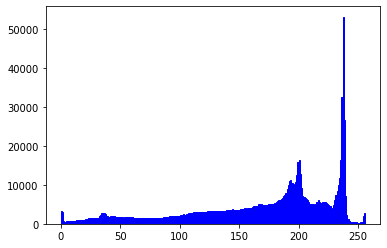

In [11]:
# Histogram for bnw image
plt.hist(imgbnw.ravel(), bins=256, range=(0, 256), fc='b', ec='b')
plt.show()

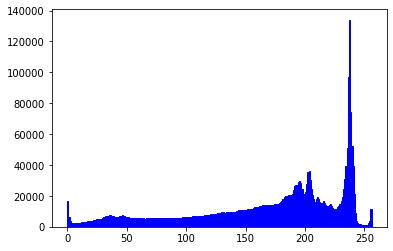